Quadrature results for f(x) = x^2 on [0, 1]:
 Midpoint Rule:    0.25
 Trapezoidal Rule: 0.5
 Simpson's Rule:   0.3333333333333333

Gauss-Legendre Quadrature (order = 4) result for f(x) = x^2 on [0, 1]: 0.33333333333333326


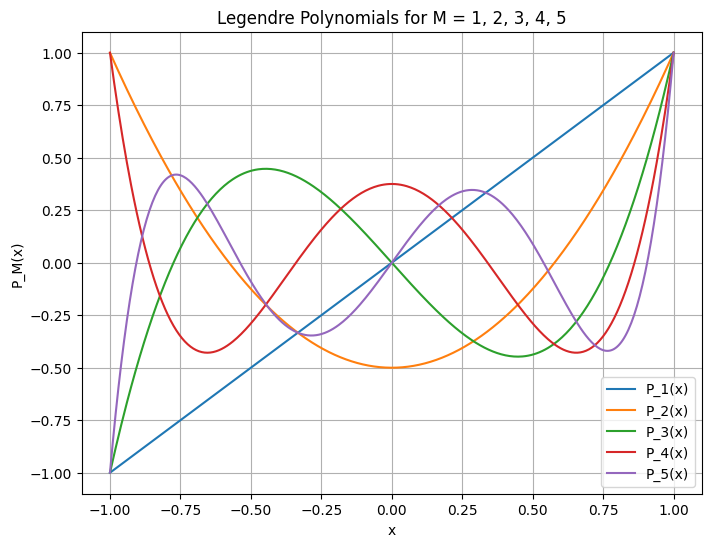


Roots and weights for M = 1, 2, 3, 4, 5 have been written to 'gauss_legendre_roots_weights.txt'.

Comparison with SciPy's roots_legendre:
Order M = 1:
 SciPy Roots:    [0.]
 SciPy Weights:  [2.]
Order M = 2:
 SciPy Roots:    [-0.57735027  0.57735027]
 SciPy Weights:  [1. 1.]
Order M = 3:
 SciPy Roots:    [-0.77459667  0.          0.77459667]
 SciPy Weights:  [0.55555556 0.88888889 0.55555556]
Order M = 4:
 SciPy Roots:    [-0.86113631 -0.33998104  0.33998104  0.86113631]
 SciPy Weights:  [0.34785485 0.65214515 0.65214515 0.34785485]
Order M = 5:
 SciPy Roots:    [-0.90617985 -0.53846931  0.          0.53846931  0.90617985]
 SciPy Weights:  [0.23692689 0.47862867 0.56888889 0.47862867 0.23692689]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import cos, pi
import sys


class Quad:
    def __init__(self):
        pass

    def midpoint(self, f, a, b):

        return (b - a) * f((a + b) / 2)

    def trapezoidal(self, f, a, b):

        return (b - a) / 2 * (f(a) + f(b))

    def simpson(self, f, a, b):

        return (b - a) / 6 * (f(a) + 4 * f((a + b) / 2) + f(b))


class GaussQuad(Quad):
    def __init__(self, order):
        """
        order: the number of quadrature points (M)
        """
        super().__init__()
        self.order = order

    def legendre_poly(self, M, x):

        if M == 0:
            return 1.0
        elif M == 1:
            return x
        else:
            Pm2 = 1.0
            Pm1 = x
            for m in range(2, M+1):
                Pm = ((2 * m - 1) * x * Pm1 - (m - 1) * Pm2) / m
                Pm2, Pm1 = Pm1, Pm
            return Pm1

    def legendre_poly_derivative(self, M, x):

        if M == 0:
            return 0.0
        return M / (1 - x**2) * (self.legendre_poly(M - 1, x) - x * self.legendre_poly(M, x))

    def find_roots_and_weights(self, tol=1e-14, max_iter=100):

        M = self.order
        roots = np.zeros(M)
        weights = np.zeros(M)
        for i in range(1, M + 1):
            # Initial guess based on cosine formula
            x = cos(pi * (4 * i - 1) / (4 * M + 2))
            # Newton's method
            for iteration in range(max_iter):
                P = self.legendre_poly(M, x)
                dP = self.legendre_poly_derivative(M, x)
                if dP == 0:
                    break
                dx = -P / dP
                x += dx
                if abs(dx) < tol:
                    break
            roots[i - 1] = x
            weights[i - 1] = 2 / ((1 - x**2) * (self.legendre_poly_derivative(M, x) ** 2))
        # Sort roots and corresponding weights
        idx = np.argsort(roots)
        return roots[idx], weights[idx]

    def gauss_legendre_quadrature(self, f, a, b):

        roots, weights = self.find_roots_and_weights()
        transformed_roots = (b - a) / 2 * roots + (a + b) / 2
        transformed_weights = (b - a) / 2 * weights
        return np.sum(transformed_weights * f(transformed_roots))

    def plot_legendre_polynomials(self):

        x_vals = np.linspace(-1, 1, 400)
        plt.figure(figsize=(8, 6))
        for M in range(1, 6):
            P_vals = np.array([self.legendre_poly(M, x) for x in x_vals])
            plt.plot(x_vals, P_vals, label=f"P_{M}(x)")
        plt.xlabel("x")
        plt.ylabel("P_M(x)")
        plt.title("Legendre Polynomials for M = 1, 2, 3, 4, 5")
        plt.legend()
        plt.grid(True)
        plt.show()


def f(x):
    return x**2

a, b = 0, 1  # integration interval

quad = Quad()
mid_result = quad.midpoint(f, a, b)
trap_result = quad.trapezoidal(f, a, b)
simp_result = quad.simpson(f, a, b)

print("Quadrature results for f(x) = x^2 on [0, 1]:")
print(" Midpoint Rule:   ", mid_result)
print(" Trapezoidal Rule:", trap_result)
print(" Simpson's Rule:  ", simp_result)


order = 4  # choose an order (number of quadrature points)
gauss_quad = GaussQuad(order)
gauss_result = gauss_quad.gauss_legendre_quadrature(f, a, b)
print(f"\nGauss-Legendre Quadrature (order = {order}) result for f(x) = x^2 on [0, 1]:", gauss_result)


gauss_quad.plot_legendre_polynomials()


output_lines = []
for M in [1, 2, 3, 4, 5]:
    gq = GaussQuad(M)
    roots, weights = gq.find_roots_and_weights()
    output_lines.append(f"Order M = {M}:\n")
    output_lines.append("Roots:\n")
    output_lines.append(" ".join(f"{r:.16f}" for r in roots) + "\n")
    output_lines.append("Weights:\n")
    output_lines.append(" ".join(f"{w:.16f}" for w in weights) + "\n")
    output_lines.append("\n")

with open("gauss_legendre_roots_weights.txt", "w") as fout:
    fout.writelines(output_lines)
print("\nRoots and weights for M = 1, 2, 3, 4, 5 have been written to 'gauss_legendre_roots_weights.txt'.")


try:
    from scipy.special import roots_legendre
    print("\nComparison with SciPy's roots_legendre:")
    for M in [1, 2, 3, 4, 5]:
        r_scipy, w_scipy = roots_legendre(M)
        print(f"Order M = {M}:")
        print(" SciPy Roots:   ", r_scipy)
        print(" SciPy Weights: ", w_scipy)
except ImportError:
    print("SciPy not available for comparison.")


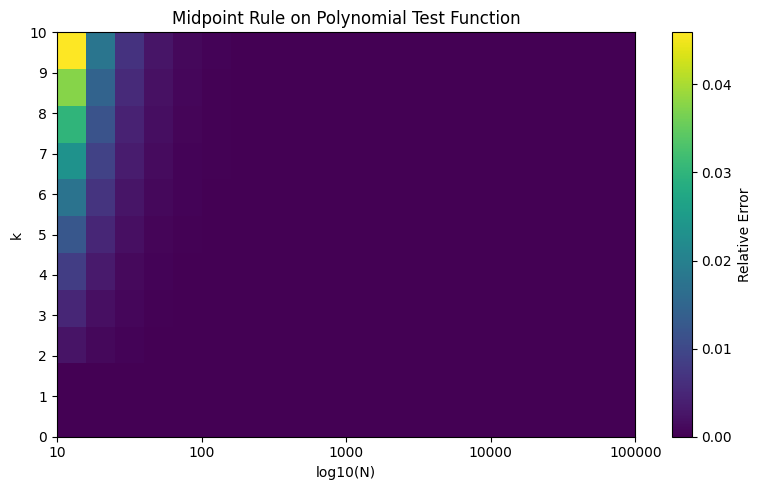

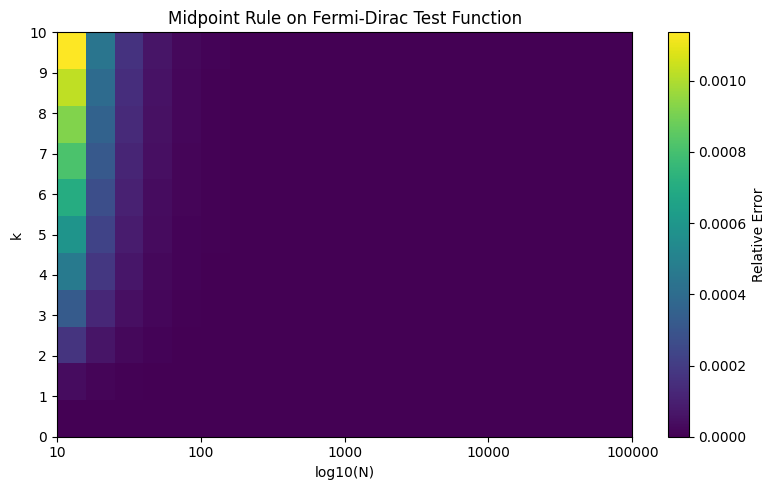

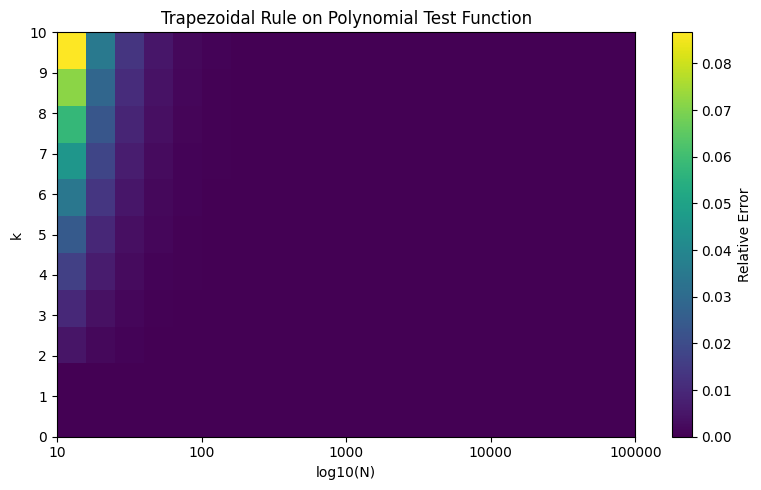

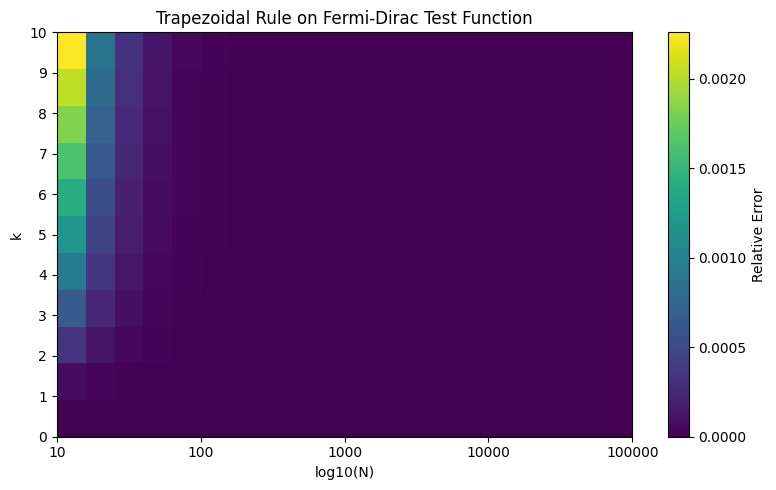

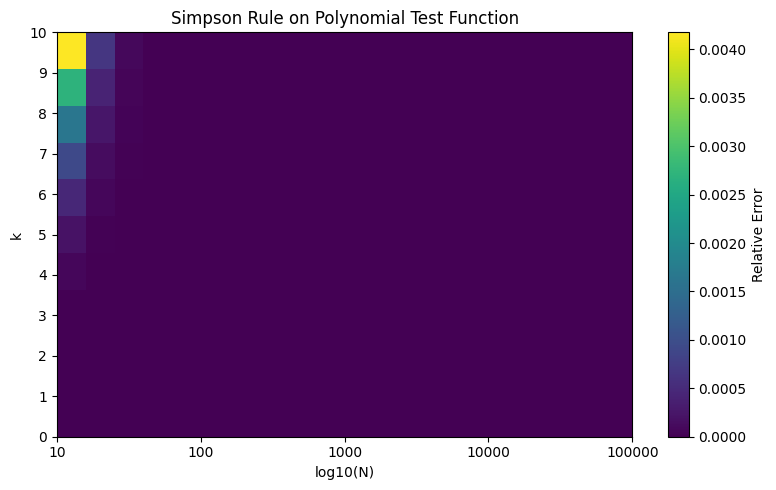

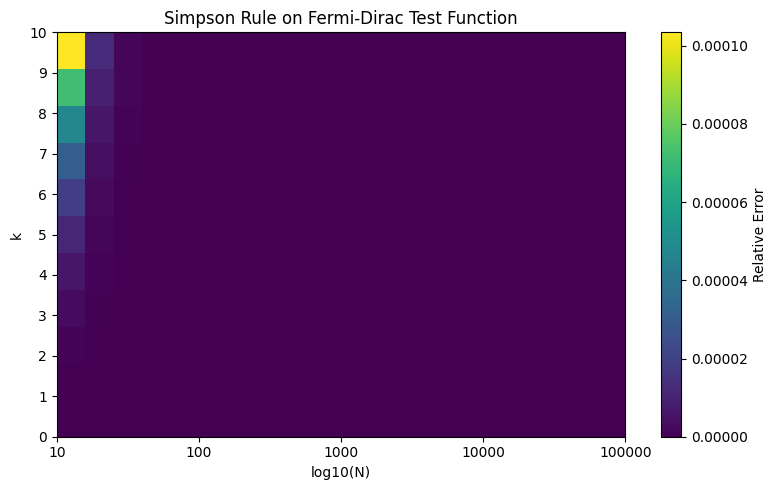

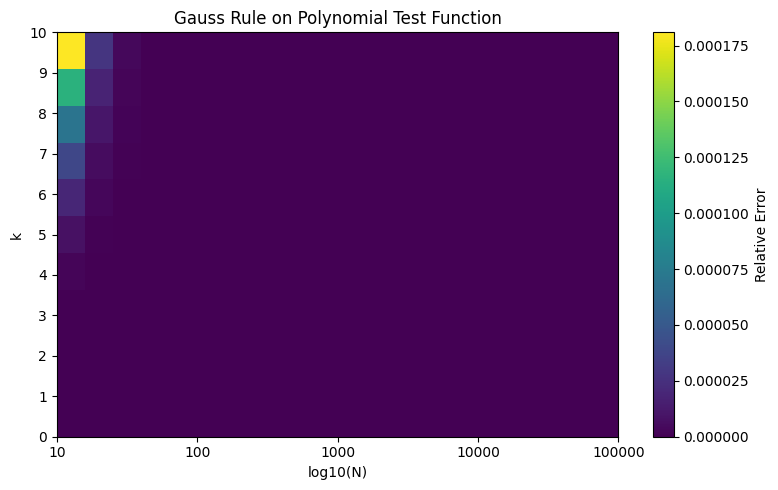

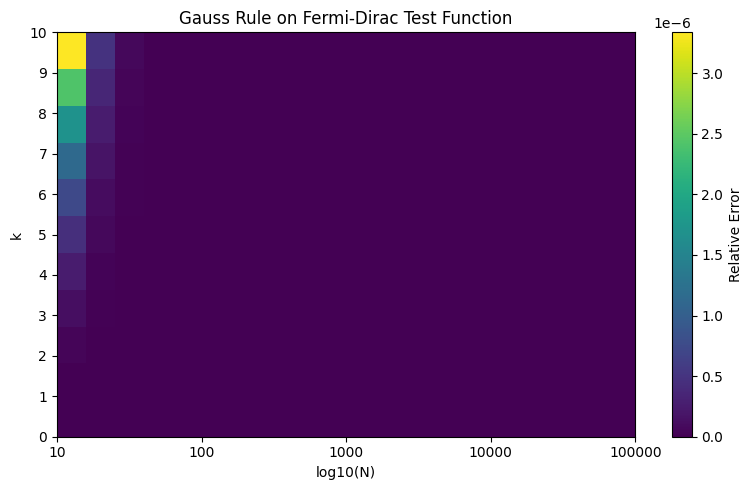

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a, b = 0.0, 1.0



def composite_midpoint(f, a, b, N, k):
    h = (b - a) / N
    # Midpoints for each subinterval
    x = a + h/2 + np.arange(N) * h
    return h * np.sum(f(x, k))

def composite_trapezoidal(f, a, b, N, k):
    h = (b - a) / N
    x = a + np.arange(N+1) * h
    return h * (0.5 * f(x[0], k) + 0.5 * f(x[-1], k) + np.sum(f(x[1:-1], k)))

def composite_simpson(f, a, b, N, k):

    if N % 2 == 1:
        N_eff = N - 1
    else:
        N_eff = N
    h = (b - a) / N_eff
    x = a + np.arange(N_eff + 1) * h
    return h/3 * (f(x[0], k) + f(x[-1], k) +
                  4 * np.sum(f(x[1:-1:2], k)) +
                  2 * np.sum(f(x[2:-1:2], k)))

def composite_gauss(f, a, b, N, k):

    h = (b - a) / N
    nodes = np.array([-1/np.sqrt(3), 1/np.sqrt(3)])
    weights = np.array([1.0, 1.0])
    total = 0.0
    for i in range(N):
        x_i = a + i * h
        # Transform nodes from [-1,1] to [x_i, x_i+h]
        x_local = (h/2)*nodes + (x_i + h/2)
        total += h/2 * np.sum(weights * f(x_local, k))
    return total


def f_poly(x, k):
    """Polynomial test function: f(x)=x^k."""
    return x**k

def true_poly(k, a, b):
    """True value of ∫_a^b x^k dx."""
    return (b**(k+1) - a**(k+1)) / (k+1)

def f_fd(x, k):
    """Fermi-Dirac test function: f(x)=1/(1+exp(-k*x)).
       For k==0, define f(x)=0.5 (the limit as k->0)."""
    if k == 0:
        return 0.5 * np.ones_like(x)
    else:
        return 1.0 / (1 + np.exp(-k*x))

def true_fd(k, a, b):
    """True value of ∫_a^b 1/(1+exp(-k*x)) dx.
       For k==0, return (b-a)*0.5."""
    if k == 0:
        return 0.5 * (b - a)
    else:
        return (np.log(np.exp(k*b) + 1) - np.log(np.exp(k*a) + 1)) / k


# k values from 0 to 10 (inclusive)
k_values = np.arange(0, 11)
# N values from 10 to 10^5 (use logarithmically spaced values)
N_values = np.unique(np.logspace(np.log10(10), np.log10(1e5), num=20, dtype=int))

methods = {
    "Midpoint": composite_midpoint,
    "Trapezoidal": composite_trapezoidal,
    "Simpson": composite_simpson,
    "Gauss": composite_gauss
}


errors = {method: {"Poly": np.zeros((len(k_values), len(N_values))),
                   "FD":   np.zeros((len(k_values), len(N_values)))}
          for method in methods.keys()}

def rel_error(true, approx):
    return 2 * np.abs(true - approx) / (np.abs(true) + np.abs(approx))

for mname, quad_func in methods.items():
    for i, k in enumerate(k_values):
        I_true_poly = true_poly(k, a, b)
        I_true_fd   = true_fd(k, a, b)
        for j, N in enumerate(N_values):
            I_poly = quad_func(f_poly, a, b, N, k)
            I_fd   = quad_func(f_fd, a, b, N, k)
            errors[mname]["Poly"][i, j] = rel_error(I_true_poly, I_poly)
            errors[mname]["FD"][i, j]   = rel_error(I_true_fd, I_fd)


def plot_heatmap(error_data, method, test_name):
    plt.figure(figsize=(8, 5))
   
    im = plt.imshow(error_data, aspect='auto', origin='lower',
                    extent=[np.log10(N_values[0]), np.log10(N_values[-1]), k_values[0], k_values[-1]],
                    cmap='viridis')
    plt.colorbar(im, label="Relative Error")
    plt.xlabel("log10(N)")
    plt.ylabel("k")
    plt.title(f"{method} Rule on {test_name} Test Function")
    xticks = np.linspace(np.log10(N_values[0]), np.log10(N_values[-1]), num=5)
    xtick_labels = [f"{10**val:.0f}" for val in xticks]
    plt.xticks(xticks, xtick_labels)
    plt.yticks(k_values)
    plt.tight_layout()
    plt.show()

for mname in methods.keys():
    plot_heatmap(errors[mname]["Poly"], mname, "Polynomial")
    plot_heatmap(errors[mname]["FD"], mname, "Fermi-Dirac")



Fixed_quad results for a=2:
n=  3, T=1.67915215, error=8.03639487e-02
n=  4, T=1.71774353, error=6.39707774e-02
n=  5, T=1.74239882, error=5.30784451e-02
n=  6, T=1.75951609, error=4.53273772e-02
n=  7, T=1.77208934, error=3.95396663e-02
n=  8, T=1.78171431, error=3.50567499e-02
n=  9, T=1.78931842, error=3.14836822e-02
n= 10, T=1.79547727, error=2.85697742e-02
n= 12, T=1.80484347, error=2.41047635e-02
n= 15, T=1.81436576, error=1.95245369e-02
n= 20, T=1.82404704, error=1.48265449e-02
n= 25, T=1.82993337, error=1.19501492e-02
n= 30, T=1.83389029, error=1.00082049e-02

Quad result for a=2:
T=1.85407468, error estimate=7.09516890e-11


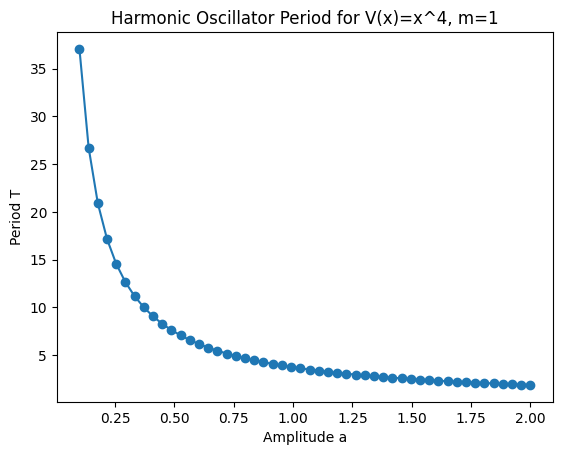

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import fixed_quad, quad
from scipy.integrate import romb as romberg
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)


def integrand(x, a):
    return 1.0 / np.sqrt(a**4 - x**4)

def period_fixed_quad(a, n):
    I, _ = fixed_quad(integrand, 0, a, args=(a,), n=n)
    return np.sqrt(8) * I

def period_quad(a):
    I, err = quad(integrand, 0, a, args=(a,))
    return np.sqrt(8) * I, err

def period_romberg(a, divmax, show=False):
    return np.sqrt(8) * romberg(lambda x: integrand(x, a), 0, a, divmax=divmax, show=show)

a_val = 2.0
n_values = [3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20, 25, 30]
results_fixed = []
errors_fixed = []
for n in n_values:
    T_n = period_fixed_quad(a_val, n)
    T_2n = period_fixed_quad(a_val, 2 * n)
    err = abs(T_2n - T_n)
    results_fixed.append(T_n)
    errors_fixed.append(err)
print("Fixed_quad results for a=2:")
for n, T_val, err in zip(n_values, results_fixed, errors_fixed):
    print(f"n={n:3d}, T={T_val:.8f}, error={err:.8e}")

T_quad, err_quad = period_quad(a_val)
print("\nQuad result for a=2:")
print(f"T={T_quad:.8f}, error estimate={err_quad:.8e}")



a_vals = np.linspace(0.1, 2, 50)
T_vals = []
for a in a_vals:
    T, _ = quad(integrand, 0, a, args=(a,))
    T_vals.append(np.sqrt(8) * T)
plt.plot(a_vals, T_vals, 'o-')
plt.xlabel('Amplitude a')
plt.ylabel('Period T')
plt.title('Harmonic Oscillator Period for V(x)=x^4, m=1')
plt.show()